# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Rich Edrick Anthonios]
- **Email:** [richeanthonios@gmail.com]
- **ID Dicoding:** [richyy]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1:
Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda pada hari kerja dan hari libur?
- Pertanyaan 2 :
Bagaimana pola penggunaan sepeda sepanjang hari pada jam-jam tertentu, dan bagaimana perbedaan ini terlihat antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
uploaded = files.upload()


import pandas as pd

day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')


Saving hour.csv to hour.csv


### Assessing Data

In [3]:
import pandas as pd

day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

print(day_df.head())
print(hour_df.head())

print(day_df.info())
print(hour_df.info())

print(day_df.isnull().sum())
print(hour_df.isnull().sum())

print(day_df.duplicated().sum())
print(hour_df.duplicated().sum())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

### Cleaning Data

In [4]:
import pandas as pd

day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')


day_df['weathersit'] = day_df['weathersit'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')


day_df = day_df.drop_duplicates()
hour_df = hour_df.drop_duplicates()


numeric_cols_day = day_df.select_dtypes(include=['number']).columns
numeric_cols_hour = hour_df.select_dtypes(include=['number']).columns

day_df[numeric_cols_day] = day_df[numeric_cols_day].fillna(day_df[numeric_cols_day].median())
hour_df[numeric_cols_hour] = hour_df[numeric_cols_hour].fillna(hour_df[numeric_cols_hour].median())


## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
import pandas as pd

day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

day_summary = day_df.describe()
print(day_summary)

hour_summary = hour_df.describe()
print(hour_summary)

day_weather_dist = day_df['weathersit'].value_counts()
hour_weather_dist = hour_df['weathersit'].value_counts()
print(day_weather_dist)
print(hour_weather_dist)

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

## Visualization & Explanatory Analysis

### Pertanyaan 1:

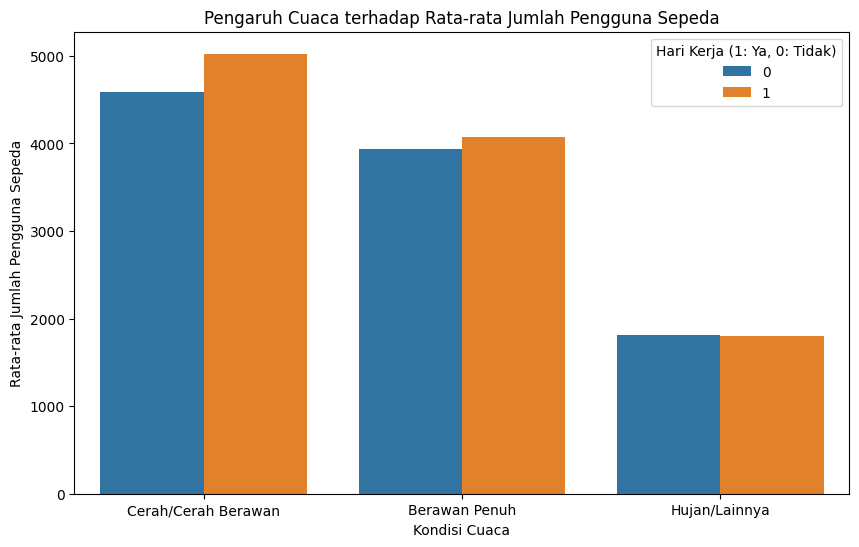


Penjelasan Visualisasi:

1. Cuaca Cerah/Cerah Berawan:
   - Hari Kerja: Penggunaan sepeda paling tinggi terjadi saat cuaca cerah atau cerah berawan pada hari kerja. Ini menunjukkan bahwa kondisi cuaca yang nyaman sangat mendorong penggunaan sepeda, terutama untuk kegiatan rutin seperti perjalanan ke tempat kerja atau sekolah.
   - Hari Libur: Penggunaan sepeda juga tinggi pada hari libur ketika cuaca cerah, meskipun sedikit lebih rendah dibandingkan hari kerja. Ini bisa terkait dengan kegiatan rekreasi atau berolahraga.

2. Cuaca Berawan Penuh:
   - Hari Kerja: Meskipun sedikit menurun, penggunaan sepeda masih cukup tinggi saat cuaca berawan penuh pada hari kerja. Ini menunjukkan bahwa meskipun cuaca tidak seideal cerah, orang masih bersedia menggunakan sepeda untuk keperluan sehari-hari.
   - Hari Libur: Pada hari libur, penggunaan sepeda menurun lebih lanjut saat cuaca berawan penuh, tetapi tetap ada penggunaan yang signifikan.

3. Cuaca Hujan/Lainnya:
   - Hari Kerja: Penggunaan se

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


day_df = pd.read_csv('day.csv')

weather_workingday_avg = day_df.groupby(['weathersit', 'workingday'])['cnt'].mean().reset_index()


weather_labels = {
    1: 'Cerah/Cerah Berawan',
    2: 'Berawan Penuh',
    3: 'Hujan/Lainnya'
}
weather_workingday_avg['weathersit'] = weather_workingday_avg['weathersit'].map(weather_labels)

plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', hue='workingday', data=weather_workingday_avg)
plt.title('Pengaruh Cuaca terhadap Rata-rata Jumlah Pengguna Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.legend(title='Hari Kerja (1: Ya, 0: Tidak)')
plt.show()


explanation = """
Penjelasan Visualisasi:

1. Cuaca Cerah/Cerah Berawan:
   - Hari Kerja: Penggunaan sepeda paling tinggi terjadi saat cuaca cerah atau cerah berawan pada hari kerja. Ini menunjukkan bahwa kondisi cuaca yang nyaman sangat mendorong penggunaan sepeda, terutama untuk kegiatan rutin seperti perjalanan ke tempat kerja atau sekolah.
   - Hari Libur: Penggunaan sepeda juga tinggi pada hari libur ketika cuaca cerah, meskipun sedikit lebih rendah dibandingkan hari kerja. Ini bisa terkait dengan kegiatan rekreasi atau berolahraga.

2. Cuaca Berawan Penuh:
   - Hari Kerja: Meskipun sedikit menurun, penggunaan sepeda masih cukup tinggi saat cuaca berawan penuh pada hari kerja. Ini menunjukkan bahwa meskipun cuaca tidak seideal cerah, orang masih bersedia menggunakan sepeda untuk keperluan sehari-hari.
   - Hari Libur: Pada hari libur, penggunaan sepeda menurun lebih lanjut saat cuaca berawan penuh, tetapi tetap ada penggunaan yang signifikan.

3. Cuaca Hujan/Lainnya:
   - Hari Kerja: Penggunaan sepeda turun drastis ketika cuaca buruk seperti hujan atau salju. Ini menunjukkan bahwa kondisi cuaca yang tidak nyaman sangat mengurangi minat orang untuk bersepeda, bahkan untuk perjalanan harian.
   - Hari Libur: Pada hari libur, penggunaan sepeda adalah yang terendah ketika cuaca buruk, yang menunjukkan bahwa orang cenderung menghindari aktivitas luar ruangan saat cuaca ekstrem.
"""

print(explanation)


### Pertanyaan 2:

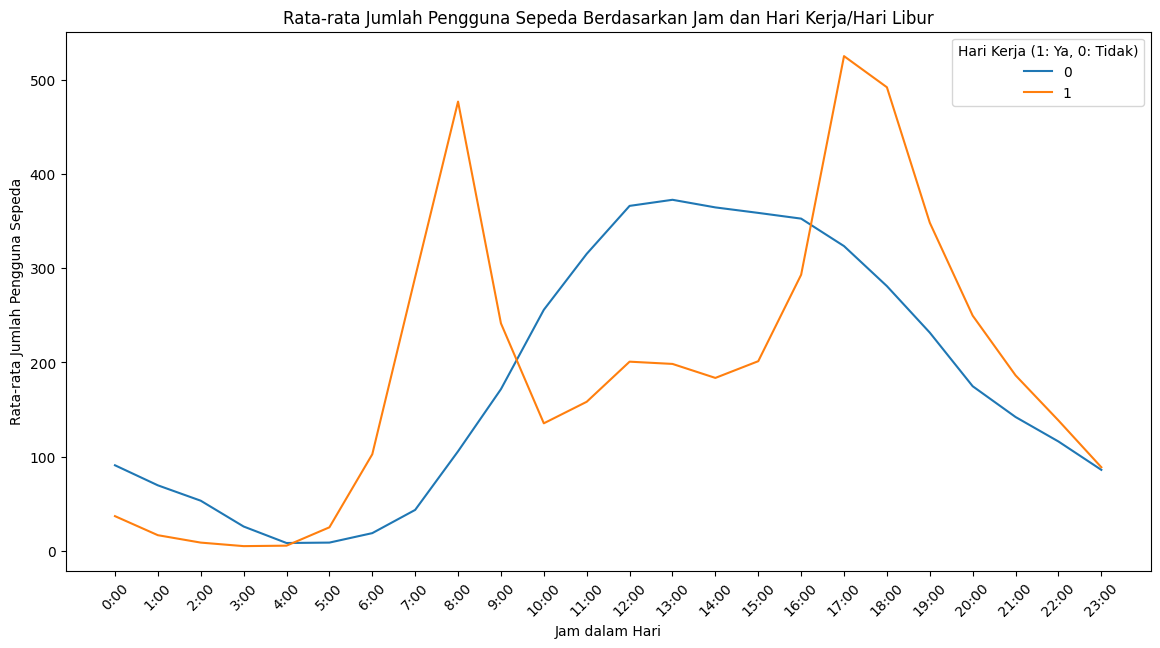


Penjelasan Visualisasi:

1. **Hari Kerja**:
   - Terdapat puncak penggunaan sepeda pada jam 7-9 pagi, yang mungkin terkait dengan perjalanan pagi ke tempat kerja atau sekolah.
   - Puncak lain terjadi pada jam 5-7 sore, menunjukkan bahwa banyak pengguna kembali ke rumah setelah bekerja.
   - Penggunaan sepeda pada hari kerja lebih terfokus pada jam sibuk pagi dan sore, mencerminkan penggunaan sepeda sebagai alat transportasi.

2. **Hari Libur**:
   - Pola penggunaan sepeda lebih merata sepanjang hari, tanpa puncak yang signifikan pada jam-jam tertentu.
   - Ini mencerminkan bahwa pada hari libur, sepeda lebih banyak digunakan untuk rekreasi atau kegiatan yang tidak terikat waktu tertentu.



In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


hour_df = pd.read_csv('hour.csv')

hour_df['hour'] = hour_df['hr'].apply(lambda x: f'{x}:00')

numeric_cols = ['cnt', 'workingday', 'hr']


hourly_mean = hour_df[numeric_cols].groupby(['hr', 'workingday']).mean().reset_index()


hourly_mean['hour'] = hourly_mean['hr'].apply(lambda x: f'{x}:00')


plt.figure(figsize=(14, 7))
sns.lineplot(x='hour', y='cnt', hue='workingday', data=hourly_mean)
plt.title('Rata-rata Jumlah Pengguna Sepeda Berdasarkan Jam dan Hari Kerja/Hari Libur')
plt.xlabel('Jam dalam Hari')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(rotation=45)
plt.legend(title='Hari Kerja (1: Ya, 0: Tidak)')
plt.show()


explanation = """
Penjelasan Visualisasi:

1. **Hari Kerja**:
   - Terdapat puncak penggunaan sepeda pada jam 7-9 pagi, yang mungkin terkait dengan perjalanan pagi ke tempat kerja atau sekolah.
   - Puncak lain terjadi pada jam 5-7 sore, menunjukkan bahwa banyak pengguna kembali ke rumah setelah bekerja.
   - Penggunaan sepeda pada hari kerja lebih terfokus pada jam sibuk pagi dan sore, mencerminkan penggunaan sepeda sebagai alat transportasi.

2. **Hari Libur**:
   - Pola penggunaan sepeda lebih merata sepanjang hari, tanpa puncak yang signifikan pada jam-jam tertentu.
   - Ini mencerminkan bahwa pada hari libur, sepeda lebih banyak digunakan untuk rekreasi atau kegiatan yang tidak terikat waktu tertentu.
"""


print(explanation)


## Conclusion

- Conclution pertanyaan 1 :
Pengaruh Cuaca Terhadap Penggunaan Sepeda:

1. Cuaca Cerah (Weathersit 1): Penggunaan sepeda paling tinggi terjadi saat cuaca cerah atau berawan sebagian. Ini menunjukkan bahwa kondisi cuaca yang nyaman dan tidak menghalangi aktivitas di luar ruangan mendorong lebih banyak orang untuk menggunakan sepeda.
2. Cuaca Berawan (Weathersit 2): Penggunaan sepeda sedikit menurun saat cuaca berawan penuh, tetapi jumlah pengguna masih relatif tinggi. Cuaca ini cukup mendukung aktivitas luar ruangan meskipun ada sedikit penurunan dibandingkan dengan hari yang cerah.
3. Cuaca Hujan atau Lainnya (Weathersit 3): Penggunaan sepeda menurun tajam ketika cuaca buruk, seperti hujan, salju, atau badai. Kondisi cuaca ini cenderung membuat orang enggan untuk menggunakan sepeda karena potensi risiko keselamatan dan ketidaknyamanan.

- Conclution pertanyaan 2 :
Pola penggunaan sepeda sangat berbeda antara hari kerja dan hari libur. Pada hari kerja, sepeda banyak digunakan untuk keperluan transportasi selama jam sibuk pagi dan sore. Sedangkan pada hari libur, penggunaan sepeda lebih tersebar sepanjang hari, menunjukkan bahwa sepeda mungkin digunakan untuk rekreasi atau kegiatan lain.